In [1]:
import pandas as analytics
import numpy as maths
import matplotlib.pyplot as graph
import os
from math import exp

In [2]:
os.chdir('../dependencies/')
from logistic_regression import logistic_regression

In [3]:
filename = 'data2'
validation_perc = 0.7
training_perc = 0.7
alphas = maths.arange(0,1,0.1)
number_of_iterations = 10
training_perc = 0.7

For iteration number  1  : 
	Average RMSE for alpha :  0.0  :  110.43434679203415
	Average RMSE for alpha :  0.1  :  1.8701859450210756
	Average RMSE for alpha :  0.2  :  1.932292516197709
	Average RMSE for alpha :  0.30000000000000004  :  2.4054530270127423
	Average RMSE for alpha :  0.4  :  2.9308997356039703
	Average RMSE for alpha :  0.5  :  3.0008927826439513
	Average RMSE for alpha :  0.6000000000000001  :  3.618769717061153
	Average RMSE for alpha :  0.7000000000000001  :  2.926221267378053
	Average RMSE for alpha :  0.8  :  7.544771666420661
	Average RMSE for alpha :  0.9  :  11.470035341492851

For iteration number  2  : 
	Average RMSE for alpha :  0.0  :  73.99814089293086
	Average RMSE for alpha :  0.1  :  1.380297954222733
	Average RMSE for alpha :  0.2  :  1.6919350982134076
	Average RMSE for alpha :  0.30000000000000004  :  2.07907728131287
	Average RMSE for alpha :  0.4  :  1.5657929070389873
	Average RMSE for alpha :  0.5  :  2.7282624207361468
	Average RMSE for alpha :

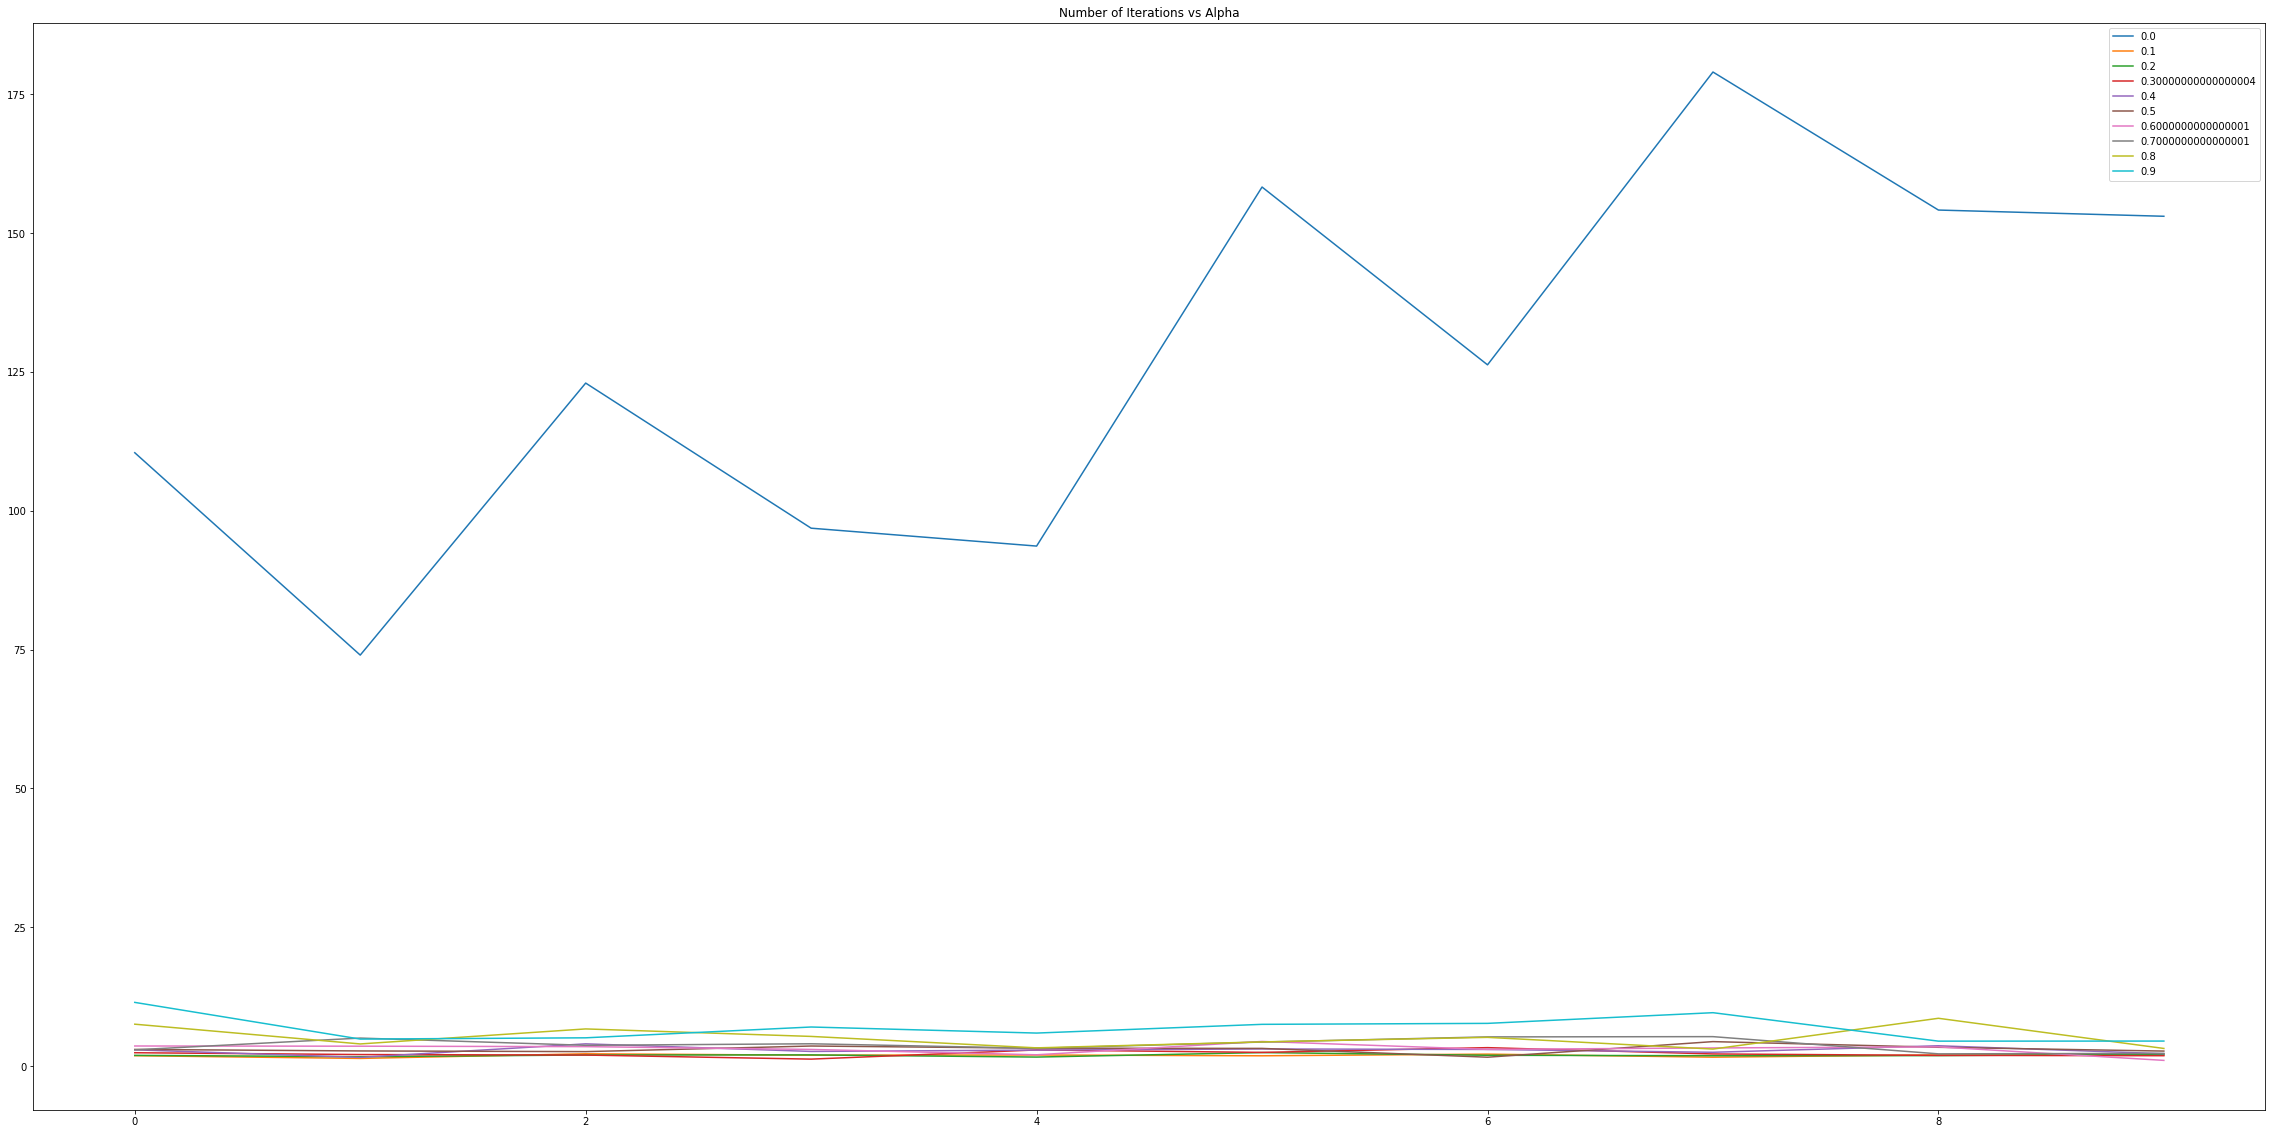

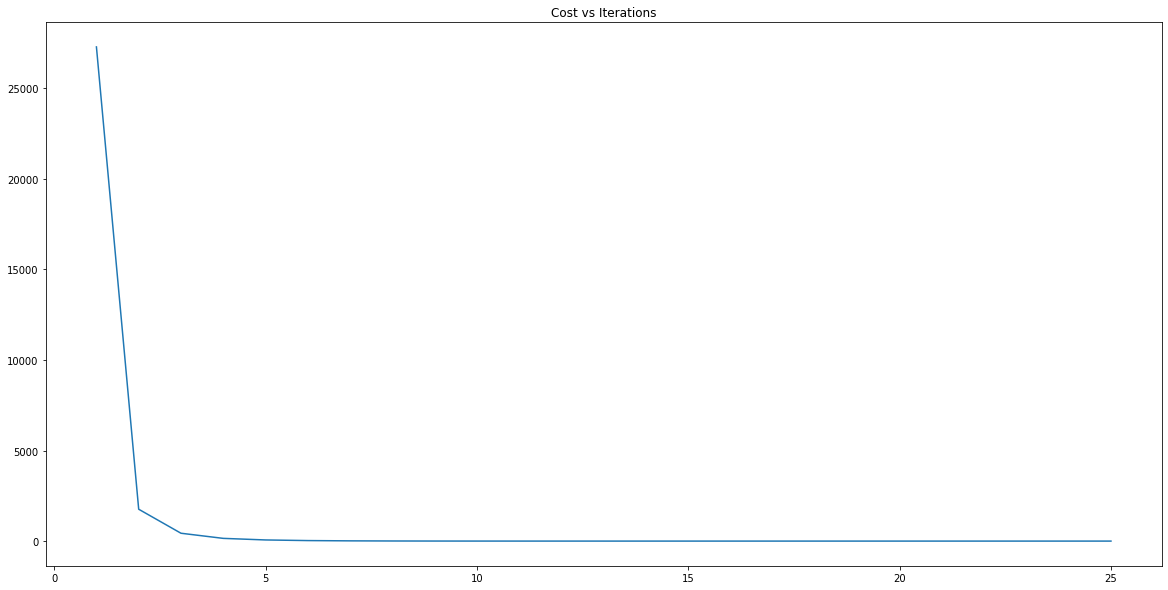

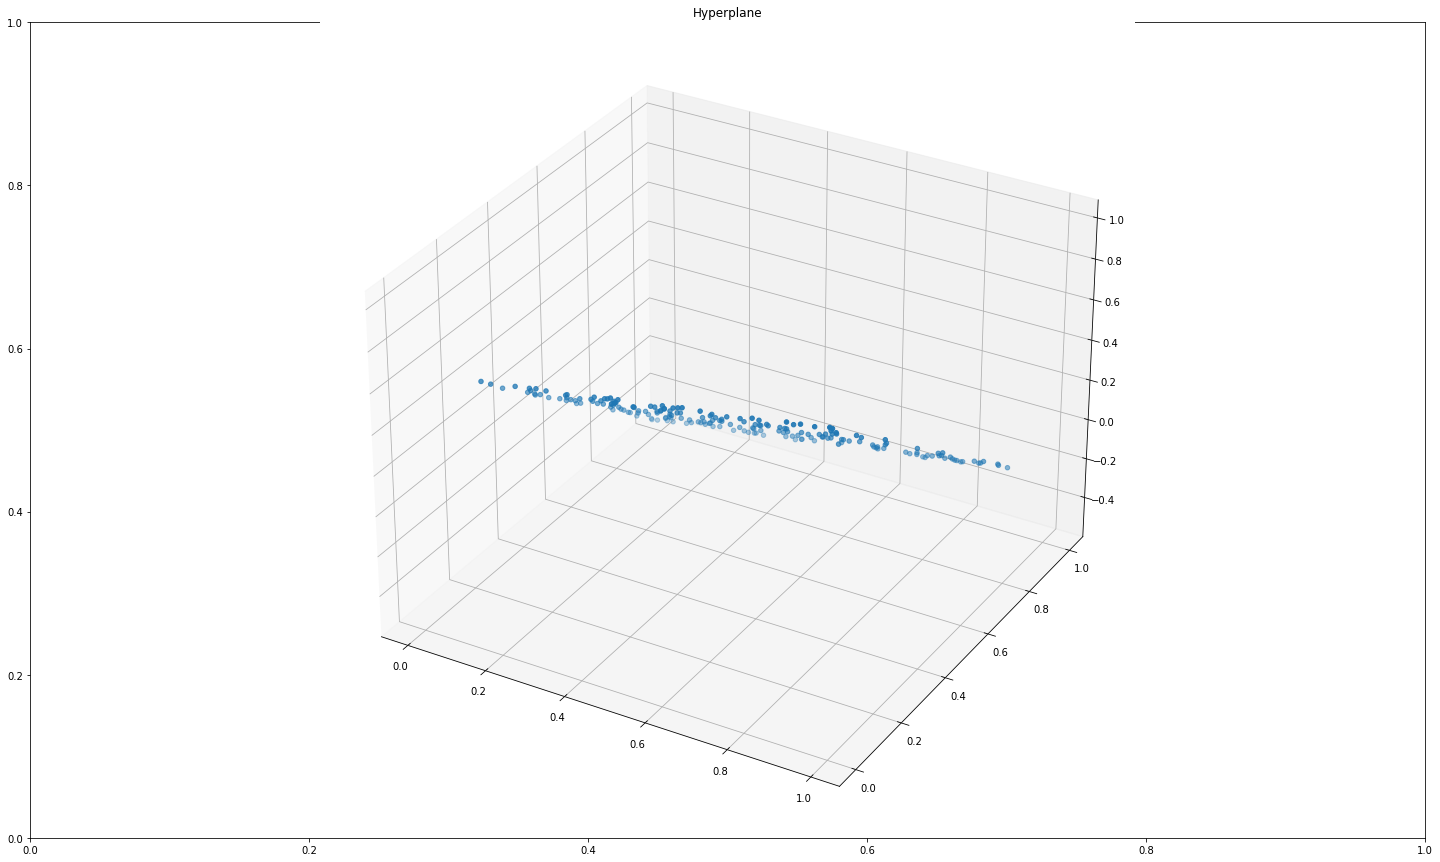

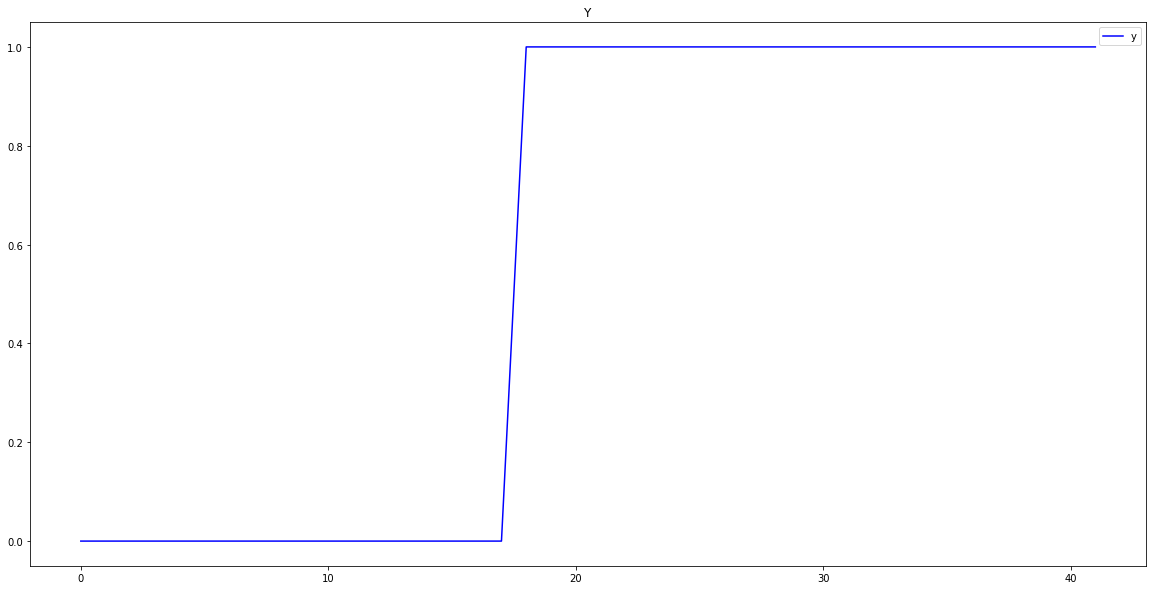

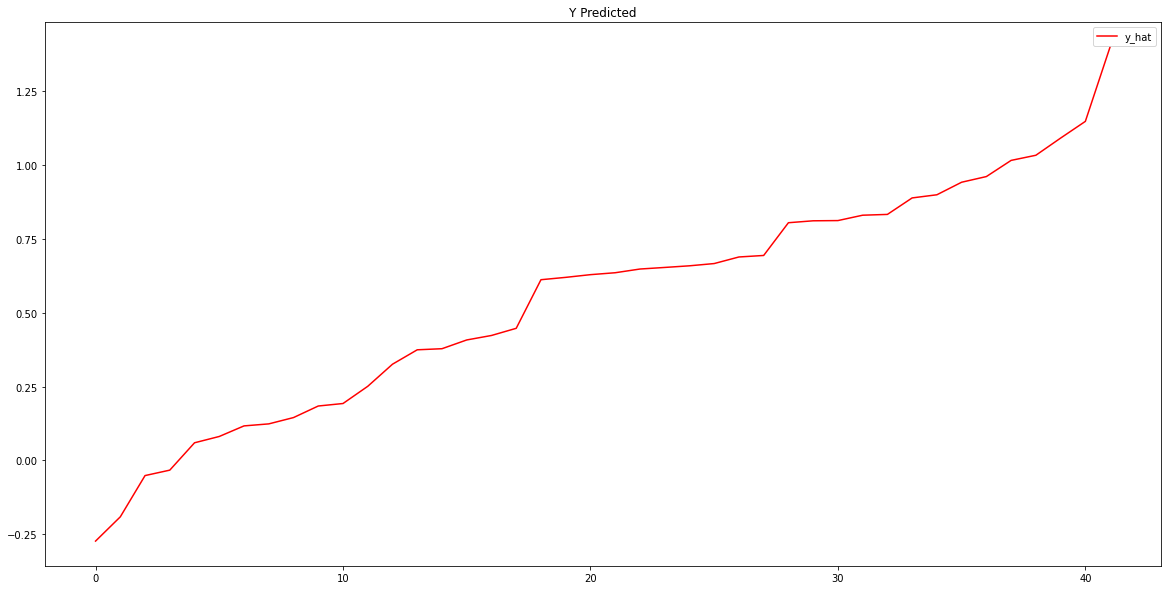

In [4]:
log_reg = logistic_regression()
log_reg.load_data(filename)
df_validation, df_test = log_reg.split_dataset(validation_perc , training_perc)
log_reg.find_weights(alphas, number_of_iterations )
log_reg.classify(df_test)